### Подключение библиотек

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import operator
from sklearn.preprocessing import LabelEncoder
import math
import warnings
warnings.filterwarnings('ignore')
import collections
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
pd.options.display.max_columns = 400
import statsmodels.api as sm
import sklearn as sk
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.cross_validation import KFold
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

### Загрузка данных

In [2]:
# загружаем данные, указываем разделитель
# строительная отрасль
df1 = pd.read_csv('data/2015_stroitelnaya_otrasl.csv', sep=',')

In [3]:
df1.head(2)

,Наименование,ОКПО,ОКОПФ,ОКФС,ОКВЭД,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано
0,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""НЕФТ...",26298557,12300,16,41.20,6671428451,384,1,0,0,0,0,5362,0,0,0,0,0,6611,0,2410,0,245,0,0,14628,0,0,0,0,0,0,6800,0,0,0,0,0,0,2258,0,0,5570,0,14628,42381,40271,0,0,0,0,0,0,0,0,248,0,1200,0,0,0,0,662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170403,0
1,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РЕГИ...",32270534,12300,16,41.20,6670415932,384,2,0,0,0,0,2703,0,0,0,0,2703,4991,-2907,149113,0,0,0,151197,153900,10,0,0,0,0,4302,4312,0,0,0,0,0,0,149588,0,0,0,149588,153900,192303,147965,44338,0,39915,4423,0,0,0,64,4179,308,0,0,0,0,0,308,0,0,308,0,0,0,0,0,0,0,0,0,0,0,20170302,0


In [4]:
# отображаем размер выборки (проверка, что все столбцы и строки загрузились)
df1.shape

(8272, 79)

In [5]:
# отображаем общую информацию о данных и проверяем типы данных
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8272 entries, 0 to 8271
Data columns (total 79 columns):
Наименование             8272 non-null object
ОКПО                     8272 non-null int64
ОКОПФ                    8272 non-null int64
ОКФС                     8272 non-null int64
ОКВЭД                    8272 non-null object
ИНН                      8272 non-null int64
Код единицы измерения    8272 non-null int64
Тип отчета               8272 non-null int64
1110                     8272 non-null int64
1120                     8272 non-null int64
1130                     8272 non-null int64
1140                     8272 non-null int64
1150                     8272 non-null int64
1160                     8272 non-null int64
1170                     8272 non-null int64
1180                     8272 non-null int64
1190                     8272 non-null int64
1100                     8272 non-null int64
1210                     8272 non-null int64
1220                     8272 non-nu

In [6]:
df1['Наименование'].value_counts()[0:26]

ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СТРОЙСЕРВИС"                        17
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "УРАЛЬСКАЯ СТРОИТЕЛЬНАЯ КОМПАНИЯ"    13
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СТРОЙМОНТАЖ"                        11
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СТРОЙКОМПЛЕКТ"                      10
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СТРОЙРЕСУРС"                        10
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "МЕГАПОЛИС"                           8
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ОЛИМП"                               8
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ВЕКТОР"                              8
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ГАРАНТ"                              7
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "СПЕЦМОНТАЖ"                          7
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ПЕРСПЕКТИВА"                         7
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "РЕМСТРОЙ"                            7
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕ

### Проверяем на наличие NaN

In [7]:
for col in df1.columns:
    nan_numbers = df1[pd.isnull(df1[col])].shape[0]
    if nan_numbers > 0:
        print(col, nan_numbers)

### Смотрим на соотношение классов в выборке

In [8]:
df1['Ликвидировано'].value_counts(normalize=False)

0    8246
1      26
Name: Ликвидировано, dtype: int64

### Статистика по выборке

In [9]:
df1.describe()

,ОКПО,ОКОПФ,ОКФС,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано
count,8.272000e+03,8272.000000,8272.000000,8.272000e+03,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8.272000e+03,8272.000000,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8.272000e+03,8272.000000,8.272000e+03,8272.000000,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8.272000e+03,8272.000000,8272.000000,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8.272000e+03,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8.272000e+03,8.272000e+03,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8.272000e+03,8.272000e+03,8.272000e+03,8.272000e+03,8272.000000,8.272000e+03,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8.272000e+03,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.000000,8272.0,8272.0,8272.000000,8272.000000,8272.0,8272.000000,8272.000000,8272.000000,8.272000e+03,8.272000e+03,8272.000000
mean,4.472248e+07,7530.566489,16.076161,6.662983e+09,383.972316,1.505561,44.650024,1.797751,6.719657,6.374033,5.855461e+03,37.691852,725.818786,207.490087,2.395977e+03,8.747759e+03,5.308042e+03,487.251209,1.420742e+04,1496.477635,1040.082205,340.812137,1.938014e+04,3.216152e+04,1.056244e+03,-20.164289,61.929279,108.569270,10.613153,2.207021e+03,3.940048e+03,3.679065e+03,109.437379,28.296301,2.435227e+03,5.992858e+03,2.643804e+03,1.720581e+04,820.170575,60.683873,1.249607e+03,1.872379e+04,3.217243e+04,3.411332e+04,3.009415e+04,3.793136e+03,356.756286,2.250049e+03,1186.502297,28.157157,165.127901,279.333293,1884.188951,2.281515e+03,752.001088,247.389144,-15.028530,43.232108,82.815885,26.246978,718.666465,3.641683,-1.846107,553.152563,-18.422510,-0.011968,0.0,0.0,-0.011968,3.248670,0.0,0.105537,3.143133,-21.472679,3.675922e+03,2.017041e+07,0.003143
std,2.838247e+07,5946.713260,1.403659,2.203460e+07,0.165542,0.501207,3359.054083,158.127742,463.451950,567.539446,1.129158e+05,1106.952507,15048.296808,4818.341706,6.017812e+04,1.343161e+05,6.383890e+04,10095.949836,9.429024e+04,17978.437874,10823.720778,9515.587358,1.497095e+05,2.358104e+05,4.506346e+04,1350.867470,3437.447405,5228.254315,440.222274,5.789789e+04,6.712341e+04,7.102575e+04,3875.610708,2571.222042,8.063461e+04,1.261451e+05,4.984500e+04,9.678681e+04,19763.934912,1364.264827,6.362653e+04,1.367936e+05,2.358142e+05,3.319938e+05,3.036839e+05,1.070828e+05,8420.137464,9.649684e+04,22465.830562,2513.711033,3168.614784,4334.779170,19784.534833,2.338858e+04,24927.577579,3431.313781,573.089413,3031.100491,2664.968118,866.104760,20330.799757,252.374789,86.489770,20163.876597,1344.400576,1.088504,0.0,0.0,1.088504,286.029614,0.0,9.598624,285.869673,1430.422062,6.699205e+04,4.181936e+02,0.055979
min,4.047100e+04,39.000000,10.000000,6.601002e+09,383.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000e+01,0.000000,-11.000000,-1353.000000,0.000000e+00,-2.000000e+00,-2.500000e+01,-2907.000000,-6.553000e+03,-4794.000000,-510.000000,-231.000000,-1.078000e+03,-3.260000e+02,-9.630000e+02,-119487.000000,0.000000,-29.000000,-12539.000000,-1.277099e+06,-8.958530e+05,-6.613000e+03,-29.000000,0.000000,-5.568000e+03,-4.645000e+03,-4.853000e+03,-2.600000e+02,0.000000,0.000000,0.000000e+00,-6.200000e+01,-4.050000e+02,0.000000e+00,0.000000e+00,-4.147450e+05,0.000000,0.000000e+00,-479748.000000,0.000000,0.000000,-148.000000,-2359.000000,-1.170000e+02,-719469.000000,-672.000000,-29985.000000,-37704.000000,-37515.000000,-3672.000000,-594445.000000,-470.000000,-6343.000000,-594445.000000,-119487.000000,-99.000000,0.0,0.0,-99.000000,0.000000,0.0,0.000

In [10]:
df1.describe(include = 'object').T

,count,unique,top,freq
Наименование,8272,7525,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СТРО...",17
ОКВЭД,8272,52,41.20,3589


### Строим функции плотности вероятности для признаков и смотрим на распределения

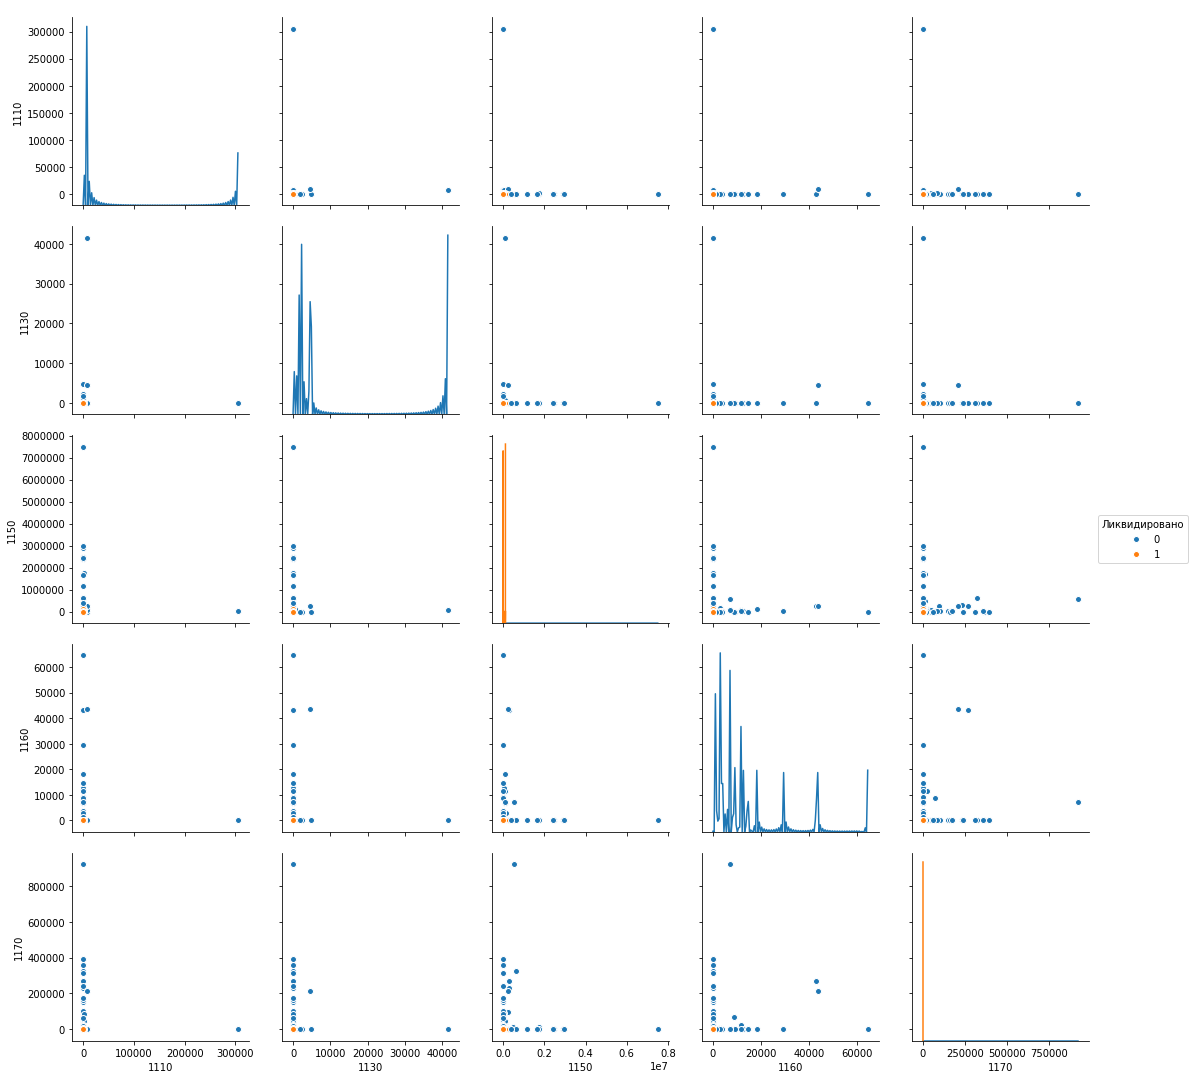

In [11]:
plot_features = ['1110', '1130', '1150', '1160', '1170']
new_palette = sns.color_palette("Paired")
sns.pairplot(df1, vars=plot_features, hue="Ликвидировано", size=3, diag_kind="kde")

### Строим функции плотности вероятности для признаков и смотрим на распределения¶

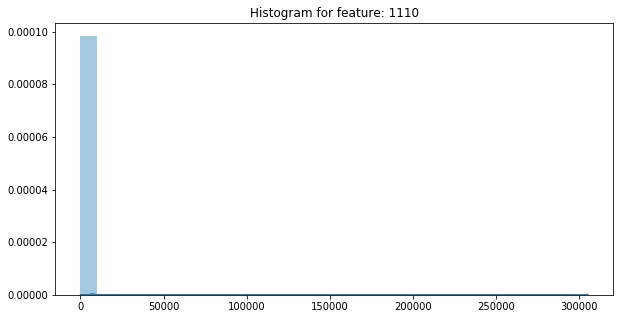

In [12]:
plot_features = ['1110']
plt.figure(figsize=(10,5))
grids = gridspec.GridSpec(len(plot_features),1)
for i,j in enumerate(df1[plot_features]):
    ax = plt.subplot(grids[i])
    sns.distplot(df1[j][df1.Ликвидировано == 0], bins=30)
    sns.distplot(df1[j][df1.Ликвидировано == 1], bins=30)
    ax.set_xlabel('')
    ax.set_title('Histogram for feature: ' + str(j))
plt.show()

### Корреляция (только статьи)

In [13]:
df1_1 = df1.iloc[:,8:32]
df1_2 = df1.iloc[:,32:56]
df1_3 = df1.iloc[:,56:77]

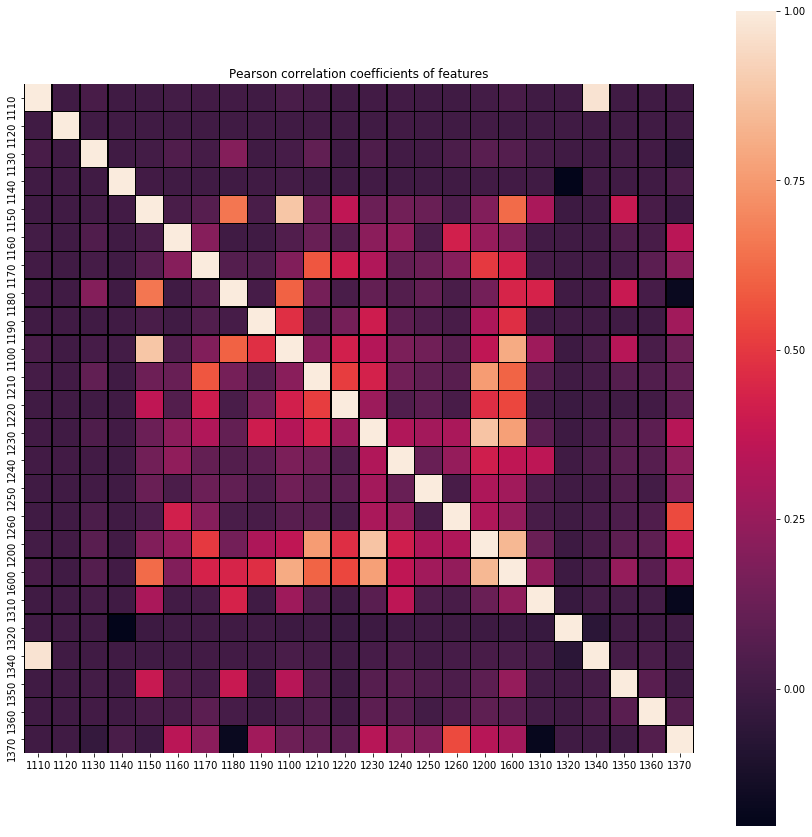

In [14]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_1.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

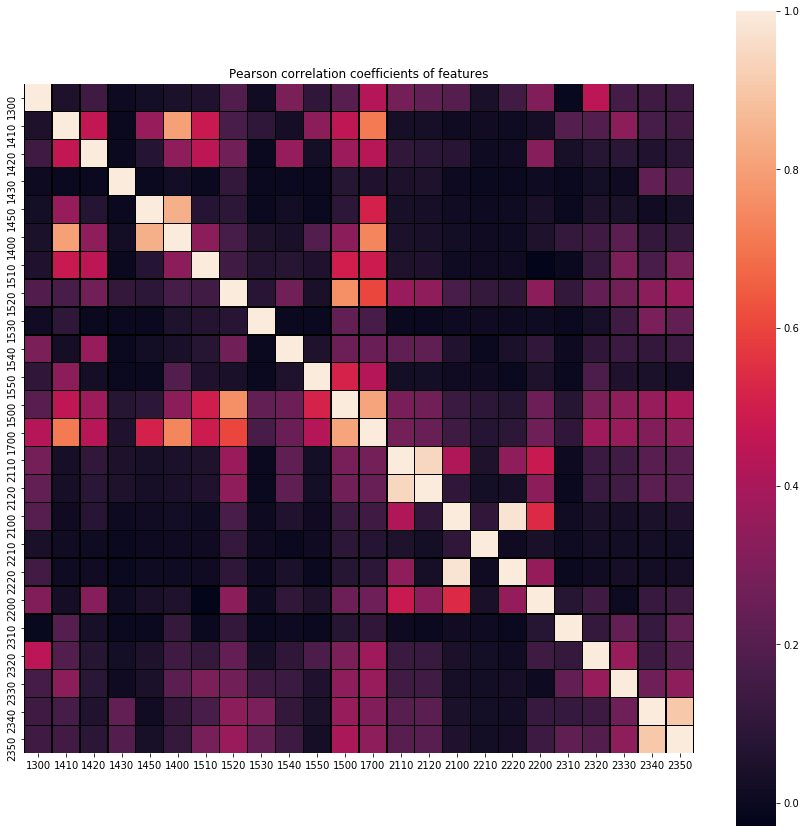

In [15]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

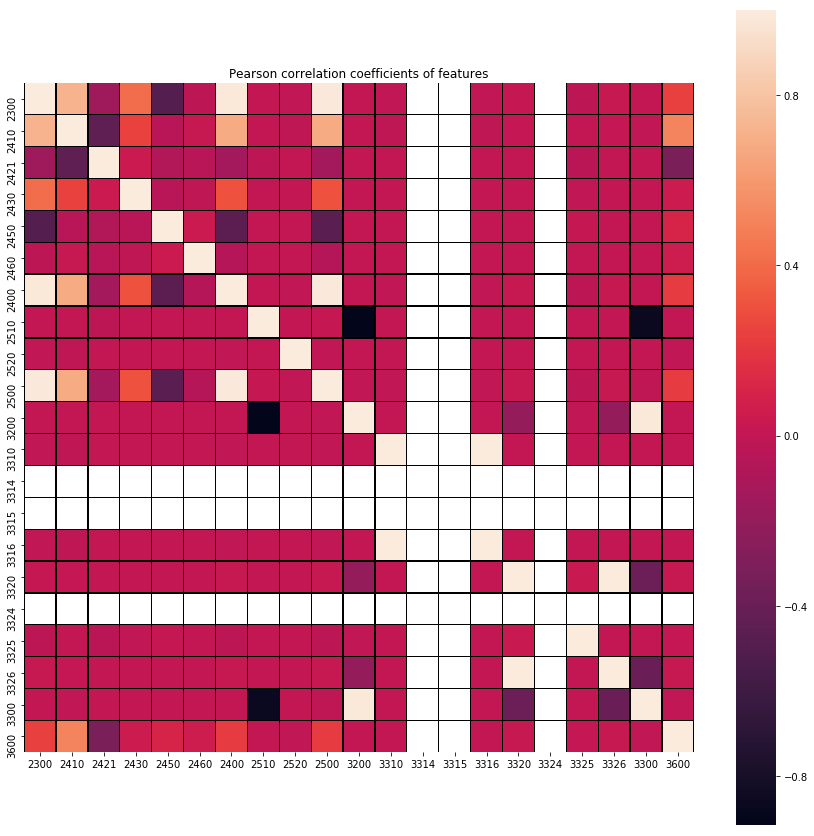

In [16]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('Pearson correlation coefficients of features')
sns.heatmap(df1_3.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='black')

In [17]:
# статьи 3314, 3315, 3324 постоянны - только нули (необходимо убрать данные признаки перед построением модели)
df1['3314'].unique(), df1['3315'].unique(), df1['3324'].unique()

(array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64))

### Корреляция признаков с целевой переменной

In [18]:
def CorrelationSelector(x,y):
    columns = x.columns
    corr_data = dict([(abs(np.corrcoef(x[c],y)[0,1]),c) for c in columns if math.isnan(abs(np.corrcoef(x[c],y)[0,1]))==False])
    sorted_corr_data = sorted(corr_data.items(), key=operator.itemgetter(0), reverse=True)
    return sorted_corr_data

In [19]:
CorrelationSelector(df1.drop(['Ликвидировано', 'Наименование', 'ОКВЭД'],1),df1['Ликвидировано'])[0:20]

[(0.043249966927124635, '1180'),
 (0.041624934217415144, 'ОКПО'),
 (0.017455286160795207, '2450'),
 (0.016766731371045927, '2400'),
 (0.016280991930428864, '2300'),
 (0.016268918085681074, '2500'),
 (0.01600303844534561, 'ИНН'),
 (0.01370650761933887, '2200'),
 (0.011486064284994676, '1370'),
 (0.010312569780123652, '1300'),
 (0.007853444485517488, '1510'),
 (0.006720969126012515, '3600'),
 (0.005913507676462461, '2430'),
 (0.005372183867710379, '1250'),
 (0.004932290051918849, 'Тип отчета'),
 (0.0048985213800239605, 'ОКОПФ'),
 (0.004728817605805878, '1260'),
 (0.004606108204783259, '1240'),
 (0.004259082090360423, '2110'),
 (0.004055193926837722, '1520')]

### Посмотрим, насколько можем понизить размерность задачи без значительно потери информации

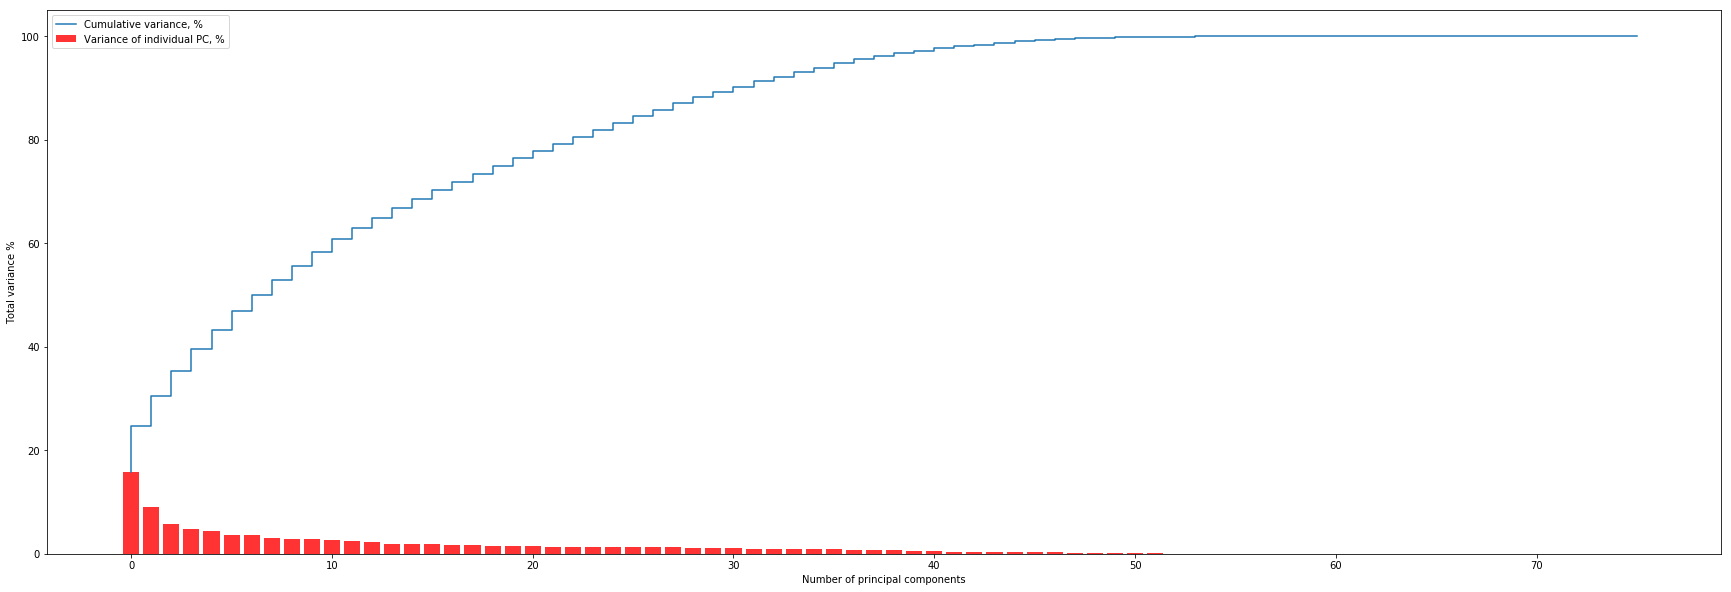

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df1.drop(['Ликвидировано', 'Наименование', 'ОКВЭД'],1))
from numpy.linalg import eig
covX = np.cov(x_scaled.T)
eigs, vecs = eig(covX)
eig_pairs = [(abs(eigs[i]),vecs[:,i]) for i in range(len(eigs))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
E = sum(eigs)
exp_variance = [(i/E)*100 for i in sorted(eigs, reverse=True)] # Individual explained variance
cum_variance = np.cumsum(exp_variance) # Cumulative explained variance

plt.figure(figsize=(30,10))
plt.bar(range(len(eigs)), exp_variance, alpha=0.8, label='Variance of individual PC, %', color = 'r')
plt.step(range(len(eigs)), cum_variance, label='Cumulative variance, %')
plt.ylabel('Total variance %')
plt.xlabel('Number of principal components')
plt.legend()
plt.show()

In [21]:
# Для сохранения 90% информации необходимо от 30 до 35 признаков 
# Возможно стоит сделать отбор признаков 

### Преобразование переменных

In [22]:
df1.columns

Index(['Наименование', 'ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН',
       'Код единицы измерения', 'Тип отчета', '1110', '1120', '1130', '1140',
       '1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230',
       '1240', '1250', '1260', '1200', '1600', '1310', '1320', '1340', '1350',
       '1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510',
       '1520', '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100',
       '2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
       '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500',
       '3200', '3310', '3314', '3315', '3316', '3320', '3324', '3325', '3326',
       '3300', '3600', 'Дата актуализации', 'Ликвидировано'],
      dtype='object')

In [23]:
# ОКПО Общероссийский классификатор предприятий и организаций  - не преобразуем, убираем из датасета при построении модели
        # В первом разделе общероссийском классификаторе находятся коды, созданные кодированием порядкового номера. Здесь создаются первые восемь цифр. Причем, первые семь – это сведения согласно порядковому номеру, а восьмая – контрольное число.
        # Источник: http://vseproip.com/otkrytie-i-zakrytie-ip/okpo/skolko-cifr-soderzhit-kod-okpo.html
        
# ОКОПФ  Общероссийский Классификатор Организационно-Правовых Форм  - может попробовать первую цифру вытащить?
        # http://ip-nalog.ru/kody-statistiki/okopf.html 
        # количество цифр разное, если только первую вытаскивать от 1 до 7 (1, 4, 5, 6 - в первом датасете)
            # 1 00 00 - организационно-правовые формы юридических лиц, являющихся коммерческими корпоративными организациями;
            # 4 00 00 - организационно-правовые формы международных организаций, осуществляющих деятельность на территории Российской Федерации;
            # 5 00 00 - организационно-правовые формы для деятельности граждан (физических лиц).
            # 6 00 00 - организационно-правовые формы юридических лиц, являющихся коммерческими унитарными организациями.
            
# ОКФС Общероссийский Классификатор Форм Собственности  - преобразуем
        # http://ip-nalog.ru/kody-statistiki/okfs.html
        # либо в 4 столбца, либо в 12
    
# ОКВЭД Общероссийский классификатор видов экономической деятельности - преобразуем
        # Первые 4 цифры или 3 цифры, в столбцы
        # XX — класс;
        # ХХ.Х — подкласс;
        # ХХ.ХХ — группа;
    
# ИНН Индивидуальный номер налогоплательщика  - преобразуем, вытаскиваем номер налоговой инспекции
        # 2 цифры - код субъекта РФ
        # следующие 2 -номер местной налоговой инспекции
        # далее номер записи и контрольные цифры
        
# Код единицы измерения - преобразуем, перевод в тысячи рублей
        # 384 Тысяча рублей   95% записей
        # 383 Рубль 
        # 385 Миллион рублей
        
# Тип отчета - 0,1,2 - до конца не понятно что это, не преобразуем, убираем из датасета

In [24]:
# преобразование ИНН
df1['Tax_inspection'] = df1['ИНН'].map(lambda x: str(x)[:-6]) # удаление последних 6 символов
df1['Tax_inspection'] = df1['Tax_inspection'].map(lambda x: str(x)[2:]) # удаление первых 2 символов

In [25]:
df1['Tax_inspection'].unique()

array(['71', '70', '74', '85', '12', '58', '72', '19', '78', '64', '23',
       '57', '83', '79', '86', '76', '33', '81', '82', '84', '77', '61',
       '59', '62', '17', '28', '60', '66', '80', '26', '68', '38', '63',
       '65', '37', '24', '48', '02', '07', '27', '25', '54', '16', '05',
       '73', '46', '13', '03', '39', '30', '21', '29', '56', '20', '52',
       '69', '04', '31', '14', '01', '32', '10', '43', '06', '35', '36',
       '67', '09', '15', '11', '34', '40', '47', '55', '49', '51'],
      dtype=object)

In [26]:
df1['Tax_inspection'].value_counts(normalize=True).head(5)

70    0.130803
58    0.120769
71    0.110493
79    0.075435
85    0.070721
Name: Tax_inspection, dtype: float64

In [55]:
# df1['ОКВЭД'].head()

0    41.20
1    41.20
2    41.20
3    41.20
4    41.20
Name: ОКВЭД, dtype: object

In [27]:
# преобразование ОКВЭД
# df1['ОКВЭД1'] = df1['ОКВЭД'].map(lambda x: len(x)<=4)
# подумать как оставить первые символы

In [28]:
df1['ОКФС'].value_counts(normalize=True)

16    0.993109
34    0.001451
24    0.001451
10    0.001088
23    0.000846
53    0.000604
19    0.000363
12    0.000242
49    0.000242
41    0.000242
14    0.000121
13    0.000121
42    0.000121
Name: ОКФС, dtype: float64

In [29]:
# преобразование ОКОПФ
# df['ОКОПФ'].value_counts(normalize=True)
# df1['ОКОПФ1'] = df1['ОКОПФ'].map(lambda x: str(x)[:-4]) # удаление последних 4 символов
# надо не удалять последние символы, а оставить только первый

In [30]:
# преобразование единиц измерения
df1['Код единицы измерения'].value_counts(normalize=True)
# 384 Тысяча рублей
# 383 Рубль 
# 385 Миллион рублей

384    0.971833
383    0.027926
385    0.000242
Name: Код единицы измерения, dtype: float64

In [31]:
df1_384 = df1[df1['Код единицы измерения']==384]
df1_383 = df1[df1['Код единицы измерения']==383]
df1_385 = df1[df1['Код единицы измерения']==385]

In [32]:
df1_384.shape, df1_383.shape, df1_385.shape

((8039, 80), (231, 80), (2, 80))

In [33]:
# не корректно работает, пока оставила только df1_384 (только тыс рублей единицы измерения)
# feature = df1_385[['1110', '1120', '1130', '1140','1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230','1240', '1250', 
#         '1260', '1200', '1600', '1310', '1320', '1340', '1350','1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510', '1520',
#         '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
#         '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500','3200', '3310', '3314', '3315', '3316', '3320', '3324', '3325', '3326',
#         '3300', '3600']]*1000
# df1_385 = df1_385[['Наименование', 'ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН',
#        'Код единицы измерения', 'Тип отчета', 'Дата актуализации', 'Ликвидировано', 'Tax_inspection']]
# df1_385= np.concatenate((df1_385, feature), axis=1)

In [34]:
df1['Тип отчета'].value_counts(normalize=True)

2    0.506165
1    0.493230
0    0.000604
Name: Тип отчета, dtype: float64

### Кодировка признаков

In [35]:
# Кодируем признак 'ОКФС' и 'Tax_inspection'
df1_384 = pd.concat([df1_384, pd.get_dummies(df1_384['ОКФС'], prefix="ОКФС"),
                            pd.get_dummies(df1_384['Tax_inspection'], prefix="Tax_inspection")],
                            axis=1)

In [36]:
df1_384.head(2)

,Наименование,ОКПО,ОКОПФ,ОКФС,ОКВЭД,ИНН,Код единицы измерения,Тип отчета,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,1210,1220,1230,1240,1250,1260,1200,1600,1310,1320,1340,1350,1360,1370,1300,1410,1420,1430,1450,1400,1510,1520,1530,1540,1550,1500,1700,2110,2120,2100,2210,2220,2200,2310,2320,2330,2340,2350,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500,3200,3310,3314,3315,3316,3320,3324,3325,3326,3300,3600,Дата актуализации,Ликвидировано,Tax_inspection,ОКФС_10,ОКФС_12,ОКФС_13,ОКФС_14,ОКФС_16,ОКФС_19,ОКФС_23,ОКФС_24,ОКФС_34,ОКФС_41,ОКФС_42,ОКФС_49,ОКФС_53,Tax_inspection_01,Tax_inspection_02,Tax_inspection_03,Tax_inspection_04,Tax_inspection_05,Tax_inspection_06,Tax_inspection_07,Tax_inspection_09,Tax_inspection_10,Tax_inspection_11,Tax_inspection_12,Tax_inspection_13,Tax_inspection_14,Tax_inspection_15,Tax_inspection_16,Tax_inspection_17,Tax_inspection_19,Tax_inspection_20,Tax_inspection_21,Tax_inspection_23,Tax_inspection_24,Tax_inspection_25,Tax_inspection_26,Tax_inspection_27,Tax_inspection_28,Tax_inspection_29,Tax_inspection_30,Tax_inspection_31,Tax_inspection_32,Tax_inspection_33,Tax_inspection_34,Tax_inspection_35,Tax_inspection_36,Tax_inspection_37,Tax_inspection_38,Tax_inspection_39,Tax_inspection_40,Tax_inspection_43,Tax_inspection_46,Tax_inspection_47,Tax_inspection_48,Tax_inspection_49,Tax_inspection_51,Tax_inspection_52,Tax_inspection_54,Tax_inspection_55,Tax_inspection_56,Tax_inspection_57,Tax_inspection_58,Tax_inspection_59,Tax_inspection_60,Tax_inspection_61,Tax_inspection_62,Tax_inspection_63,Tax_inspection_64,Tax_inspection_65,Tax_inspection_66,Tax_inspection_67,Tax_inspection_68,Tax_inspection_69,Tax_inspection_70,Tax_inspection_71,Tax_inspection_72,Tax_inspection_73,Tax_inspection_74,Tax_inspection_76,Tax_inspection_77,Tax_inspection_78,Tax_inspection_79,Tax_inspection_80,Tax_inspection_81,Tax_inspection_82,Tax_inspection_83,Tax_inspection_84,Tax_inspection_85,Tax_inspection_86
0,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""НЕФТ...",26298557,12300,16,41.20,6671428451,384,1,0,0,0,0,5362,0,0,0,0,0,6611,0,2410,0,245,0,0,14628,0,0,0,0,0,0,6800,0,0,0,0,0,0,2258,0,0,5570,0,14628,42381,40271,0,0,0,0,0,0,0,0,248,0,1200,0,0,0,0,662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20170403,0,71,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РЕГИ...",32270534,12300,16,41.20,6670415932,384,2,0,0,0,0,2703,0,0,0,0,2703,4991,-2907,149113,0,0,0,151197,153900,10,0,0,0,0,4302,4312,0,0,0,0,0,0,149588,0,0,0,149588,153900,192303,147965,44338,0,39915,4423,0,0,0,64,4179,308,0,0,0,0,0,308,0,0,308,0,0,0,0,0,0,0,0,0,0,0,20170302,0,70,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Удаление признаков, которые не понадобятся для построения моделей

In [37]:
df1_384 = df1_384.drop(['ОКПО', 'ОКОПФ', 'ОКФС', 'ОКВЭД', 'ИНН', 'Tax_inspection',
       'Код единицы измерения', 'Тип отчета',  '3314', '3315', '3324', 'Дата актуализации'], axis=1)

In [38]:
df1_384.columns

Index(['Наименование', '1110', '1120', '1130', '1140', '1150', '1160', '1170',
       '1180', '1190',
       ...
       'Tax_inspection_77', 'Tax_inspection_78', 'Tax_inspection_79',
       'Tax_inspection_80', 'Tax_inspection_81', 'Tax_inspection_82',
       'Tax_inspection_83', 'Tax_inspection_84', 'Tax_inspection_85',
       'Tax_inspection_86'],
      dtype='object', length=157)

### Датасеты для отдельных моделей

In [39]:
# только статьи
df1_384_articles = df1_384[['Наименование','1110', '1120', '1130', '1140', '1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230',
       '1240', '1250', '1260', '1200', '1600', '1310', '1320', '1340', '1350', '1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510',
       '1520', '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
       '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500', '3200', '3310', '3316', '3320', '3325', '3326', '3300', '3600', 'Ликвидировано']]
# только данные по ОКФС, налоговой инспекции
df1_384_info = df1_384.drop(['1110', '1120', '1130', '1140', '1150', '1160', '1170', '1180', '1190', '1100', '1210', '1220', '1230',
       '1240', '1250', '1260', '1200', '1600', '1310', '1320', '1340', '1350', '1360', '1370', '1300', '1410', '1420', '1430', '1450', '1400', '1510',
       '1520', '1530', '1540', '1550', '1500', '1700', '2110', '2120', '2100','2210', '2220', '2200', '2310', '2320', '2330', '2340', '2350', '2300',
       '2410', '2421', '2430', '2450', '2460', '2400', '2510', '2520', '2500', '3200', '3310', '3316', '3320', '3325', '3326', '3300', '3600'], axis=1)
# все вместе  - df1_384

In [40]:
df1_384_articles.columns

Index(['Наименование', '1110', '1120', '1130', '1140', '1150', '1160', '1170',
       '1180', '1190', '1100', '1210', '1220', '1230', '1240', '1250', '1260',
       '1200', '1600', '1310', '1320', '1340', '1350', '1360', '1370', '1300',
       '1410', '1420', '1430', '1450', '1400', '1510', '1520', '1530', '1540',
       '1550', '1500', '1700', '2110', '2120', '2100', '2210', '2220', '2200',
       '2310', '2320', '2330', '2340', '2350', '2300', '2410', '2421', '2430',
       '2450', '2460', '2400', '2510', '2520', '2500', '3200', '3310', '3316',
       '3320', '3325', '3326', '3300', '3600', 'Ликвидировано'],
      dtype='object')

In [41]:
df1_384_info.columns

Index(['Наименование', 'Ликвидировано', 'ОКФС_10', 'ОКФС_12', 'ОКФС_13',
       'ОКФС_14', 'ОКФС_16', 'ОКФС_19', 'ОКФС_23', 'ОКФС_24', 'ОКФС_34',
       'ОКФС_41', 'ОКФС_42', 'ОКФС_49', 'ОКФС_53', 'Tax_inspection_01',
       'Tax_inspection_02', 'Tax_inspection_03', 'Tax_inspection_04',
       'Tax_inspection_05', 'Tax_inspection_06', 'Tax_inspection_07',
       'Tax_inspection_09', 'Tax_inspection_10', 'Tax_inspection_11',
       'Tax_inspection_12', 'Tax_inspection_13', 'Tax_inspection_14',
       'Tax_inspection_15', 'Tax_inspection_16', 'Tax_inspection_17',
       'Tax_inspection_19', 'Tax_inspection_20', 'Tax_inspection_21',
       'Tax_inspection_23', 'Tax_inspection_24', 'Tax_inspection_25',
       'Tax_inspection_26', 'Tax_inspection_27', 'Tax_inspection_28',
       'Tax_inspection_29', 'Tax_inspection_30', 'Tax_inspection_31',
       'Tax_inspection_32', 'Tax_inspection_33', 'Tax_inspection_34',
       'Tax_inspection_35', 'Tax_inspection_36', 'Tax_inspection_37',
       'Tax_

### Разделение на train и test

In [42]:
df1_384_articles.shape, df1_384_info.shape, df1_384.shape

((8039, 68), (8039, 91), (8039, 157))

In [43]:
abs(df1_384['Наименование'].count()*0.80)

6431.200000000001

In [44]:
# весь датасет
df1_384_train = df1_384[0:6431]
df1_384_test = df1_384[6431:8040]
# только статьи
df1_384_articles_train = df1_384_articles[0:6431]
df1_384_articles_test = df1_384_articles[6431:8040]
# только данные по ОКФС, налоговой инспекции
df1_384_info_train = df1_384_info[0:6431]
df1_384_info_test = df1_384_info[6431:8040]

In [45]:
df1_384_train['Ликвидировано'].value_counts()

0    6414
1      17
Name: Ликвидировано, dtype: int64

In [46]:
df1_384_test['Ликвидировано'].value_counts()

0    1600
1       8
Name: Ликвидировано, dtype: int64

In [47]:
# соотношение классов 
df1_384_train['Ликвидировано'].sum()/len(df1_384_train), df1_384_test['Ликвидировано'].sum()/len(df1_384_test)

(0.002643445809360908, 0.004975124378109453)

In [48]:
# отделим признаки от целевой переменной для каждого датасета
# все признаки
x_train, y_train = df1_384_train.drop(['Наименование','Ликвидировано'],1), df1_384_train['Ликвидировано']
x_test, y_test = df1_384_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_test['Ликвидировано']
# только статьи
x_articles_train, y_articles_train = df1_384_articles_train.drop(['Наименование','Ликвидировано'],1), df1_384_articles_train['Ликвидировано']
x_articles_test, y_articles_test = df1_384_articles_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_articles_test['Ликвидировано']
# только данные по ОКФС, налоговой инспекции
df1_384_info
x_info_train, y_info_train = df1_384_info_train.drop(['Наименование','Ликвидировано'],1), df1_384_info_train['Ликвидировано']
x_info_test, y_info_test = df1_384_info_test.drop(['Наименование', 'Ликвидировано'],1), df1_384_info_test['Ликвидировано']

In [49]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6431, 155), (6431,), (1608, 155), (1608,))

In [50]:
x_articles_train.shape, y_articles_train.shape, x_articles_test.shape, y_articles_test.shape

((6431, 66), (6431,), (1608, 66), (1608,))

In [51]:
x_info_train.shape, y_info_train.shape, x_info_test.shape, y_info_test.shape

((6431, 89), (6431,), (1608, 89), (1608,))

### Отображение целевой

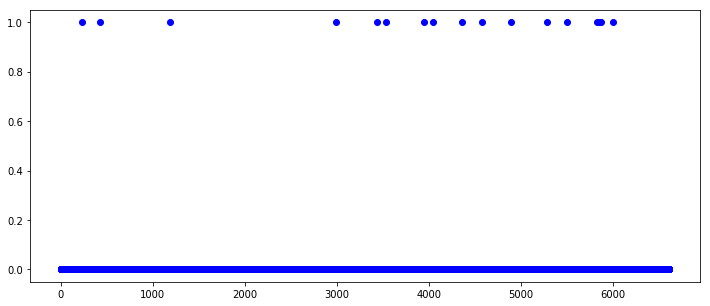

In [52]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, 'go', color='b')

plt.show()

### Кросс-валидация и подбор параметров

In [53]:
# функция кросс валидации
def show_cv(clf_i, name, f, l, cv, score='accuracy', param=None, vbs=False):  
    if param: 
        grid_cv = GridSearchCV(
            clf_i,
            param,
            scoring=score,
            cv=cv,
            verbose=vbs,
            n_jobs=10
        )
        grid_cv.fit(f, l)
        clf_i = grid_cv.best_estimator_
        print(grid_cv.best_params_)
    score = cross_val_score(clf_i,f,l,cv=cv, scoring=score, n_jobs=10)
    print(name, score.mean(), score)
    return score

In [54]:
ridge_model=RidgeClassifier(random_state=0)
logist_model=LogisticRegression(random_state=0)  
tree_model=DecisionTreeClassifier(random_state=0)
rf_model=RandomForestClassifier(random_state=0)
xgb_model = xgb.XGBClassifier(random_state=0)
linear_svc_model = LinearSVC(random_state=0)
svc_model = SVC(random_state=0)

clfs = [
        ["Ridge", ridge_model],
        ["LogistRegr", logist_model],
        ["Tree", tree_model],
        ["RandomForest", rf_model],
        ["XGBoost", xgb_model],
        ["LinearSVC", linear_svc_model],
        ["SVC", svc_model]
       ]

parameters = {
             "Ridge": 
              {
                  "alpha": [0.001, 0.05, 0.1, 0.3,0.5, 1, 3, 5, 10, 15, 30, 50, 75, 100]
              },
              "LogistRegr":
              {
                  "penalty": ['l1','l2'],
                  "C" : [0.0001,0.001,0.01,0.1,1,10,100],
                  "max_iter": [100,200,300,400,500,600],
                  "tol": [1e-5,1e-4,1e-3], 
                  "class_weight": ['balanced']       
              },
              "Tree":
              {
                   "max_depth":[5,10,15],
                   "max_features":[0.6,0.7,0.8,0.9],
                   "min_samples_split":[2,3,5,7]

              },
              "RandomForest":
              {
                  "max_depth":[4,5,6,8],
                  "max_features":[0.4,0.5,0.6,0.7,0.8],
                  "min_samples_split":[2,3,5,7],
                  "n_estimators":[20,30,40,50,100]
              },
              "XGBoost":
              {
                  "n_estimators": [20,30,40,50,100],
                  "max_depth": [3, 5, 7,10],
                  "learning_rate": [0.01, 0.1, 0.2, 0.5],
                  "subsample": [0.4, 0.5, 0.6, 0.8],
                  "colsample_bytree": [0.5, 0.6, 0.7],
                  'gamma': [0.1,0.2,0.3,0.5,1]  
              },
                 "LinearSVC":
              {
                    "penalty": ['l2'],
                    "loss": ['hinge', 'squared_hinge'],
                    "tol": [1e-5,1e-4,1e-3],
                    "C" : [0.0001,0.001,0.01,0.1,1,10,100],
                    "class_weight": ['balanced'], 
                    "max_iter": [50,100,150,200,250]
              },
                "SVC":
              {
                    "tol": [1e-5,1e-4,1e-3],
                    "C" : [0.0001,0.001,0.01,0.1,1,10,100],
                    "class_weight": ['balanced'], 
                    "max_iter": [50,100,150,200,250] 
              }             
           
             }

size = len(y_train)
folds = 3
cv = KFold(size, n_folds = folds, shuffle = True, random_state = 0)

# score_ridge = show_cv(ridge_model, "Ridge", x_train, y_train, cv = cv, param = parameters.get("Ridge"), vbs = True)
score_logist= show_cv(logist_model,"LogistRegr",x_train, y_train,cv=cv,param=parameters.get("LogistRegr"),vbs=True)
score_tree= show_cv(tree_model,"Tree",x_train, y_train,cv=cv,param=parameters.get("Tree"),vbs=True)
# score_rf = show_cv(rf_model, "RandomForest", x_train, y_train, cv = cv, param = parameters.get("RandomForest"), vbs = True)
# score_xgb = show_cv(xgb_model, "XGBoost", x_train, y_train, cv = cv, param = parameters.get("XGBoost"), vbs = True)
# score_linear_svc = show_cv(linear_svc_model, "LinearSVC", x_train, y_train, cv = cv, param = parameters.get("LinearSVC"), vbs = True)
# score_svc = show_cv(svc_model, "SVC", x_train, y_train, cv = cv, param = parameters.get("SVC"), vbs = True)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 11.2min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 35.9min
[Parallel(n_jobs=10)]: Done 756 out of 756 | elapsed: 48.9min finished


{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'tol': 0.001}
LogistRegr 0.9284696007828334 [0.92210821 0.94682836 0.91647224]
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   19.5s
[Parallel(n_jobs=10)]: Done 144 out of 144 | elapsed:   25.4s finished


{'max_depth': 5, 'max_features': 0.7, 'min_samples_split': 2}
Tree 0.9968902570674393 [0.99580224 0.99673507 0.99813346]


In [134]:
# Лучшие параметры
# {'alpha': 50}
# Ridge 0.996579384342868 [0.99393657 0.99720149 0.99860009]

# {'C': 0.001, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'tol': 0.001}
# LogistRegr 0.9284696007828334 [0.92210821 0.94682836 0.91647224]

# {'max_depth': 5, 'max_features': 0.7, 'min_samples_split': 2}
# Tree 0.9968902570674393 [0.99580224 0.99673507 0.99813346]

In [143]:
def mae(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred))) 
def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100*np.mean((np.abs(y_true - y_pred))/(abs(y_true)+abs(y_pred)))
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def wape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100*sum(np.abs((y_true - y_pred)))/sum(y_true)

### Ridge

In [155]:
# clf_ridge = RidgeClassifier(alpha=50,  random_state =0, normalize=True)
# clf_ridge.fit(x_train, y_train) 

RidgeClassifier(alpha=3, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=True, random_state=0, solver='auto',
        tol=0.001)

In [156]:
# clf_ridge.score(x_train, y_train)

0.9891435464414958

In [157]:
# ridge = clf_ridge.predict(x_test)

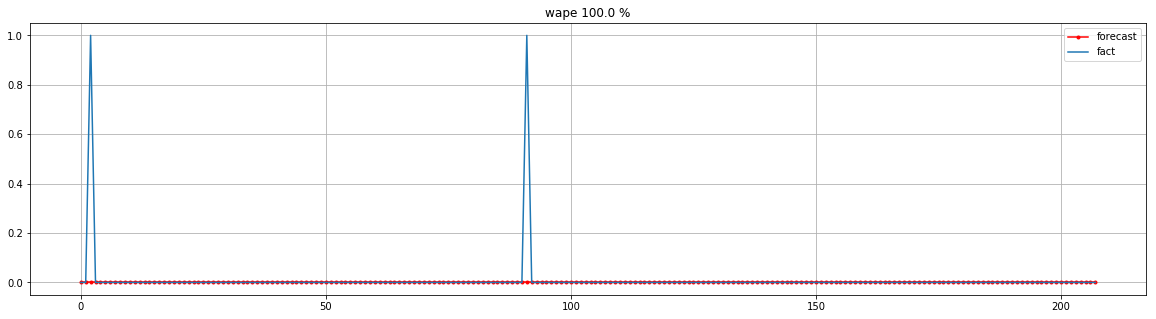

In [158]:
# plt.figure(figsize=(20, 5))
# plt.plot(ridge, ".r-", label="forecast")

# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, ridge))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

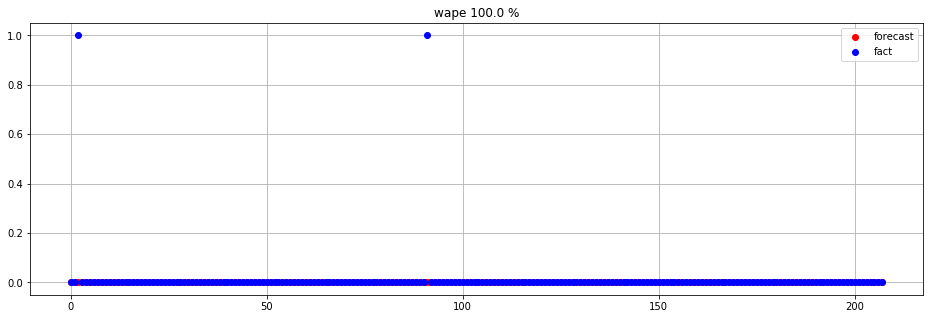

In [159]:
# plt.figure(figsize=(16, 5))
# plt.plot(ridge, 'go', color='r', label="forecast")
# plt.plot(y_test.values, 'go', color='b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, ridge))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [160]:
# mae(y_test.values, ridge)

0.009615384615384616

In [161]:
# coefficient_of_dermination = r2_score(y_test.values, ridge)
# coefficient_of_dermination

-0.009708737864077444

### LogistRegr

In [178]:
# clf_logreg = LogisticRegression(C= 1e-05, class_weight= 'balanced', max_iter= 100, penalty= 'l1', tol= 1e-05,  random_state =1)
# clf_logreg.fit(x_train, y_train) 

LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=1,
          solver='liblinear', tol=1e-05, verbose=0, warm_start=False)

In [179]:
# clf_logreg.score(x_train, y_train)

0.9589867310012062

In [180]:
# logreg_forc = clf_logreg.predict(x_test)

In [181]:
# mae(y_test.values, logreg_forc)

0.052884615384615384

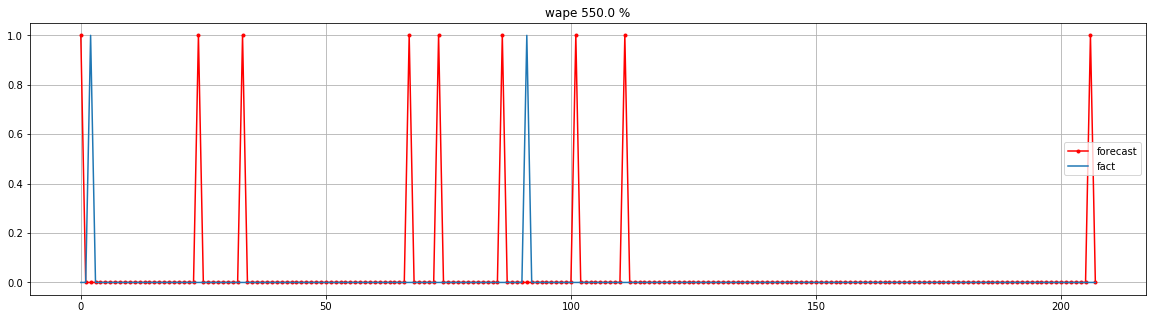

In [182]:
# plt.figure(figsize=(20, 5))
# plt.plot(logreg_forc, ".r-", label="forecast")

# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, logreg_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

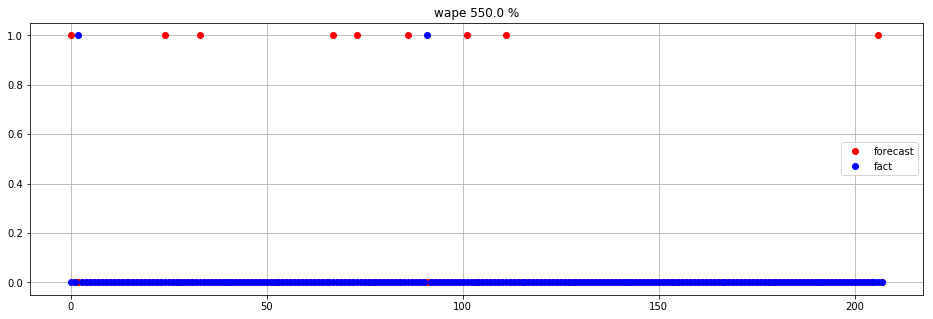

In [183]:
# plt.figure(figsize=(16, 5))
# plt.plot(logreg_forc, 'go', color='r', label="forecast")
# plt.plot(y_test.values, 'go', color='b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, logreg_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [184]:
# coefficient_of_dermination = r2_score(y_test.values, logreg_forc)
# coefficient_of_dermination

-4.5533980582524265

### Tree

In [185]:
# clf_tree = DecisionTreeClassifier(max_depth = 5, max_features = 0.6,  min_samples_split = 7, random_state =0)
# clf_tree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [186]:
# clf_tree.score(x_train, y_train)

0.991556091676719

In [187]:
# tree_forc = clf_tree.predict(x_test)

In [189]:
# mae(y_test.values, tree_forc)

0.009615384615384616

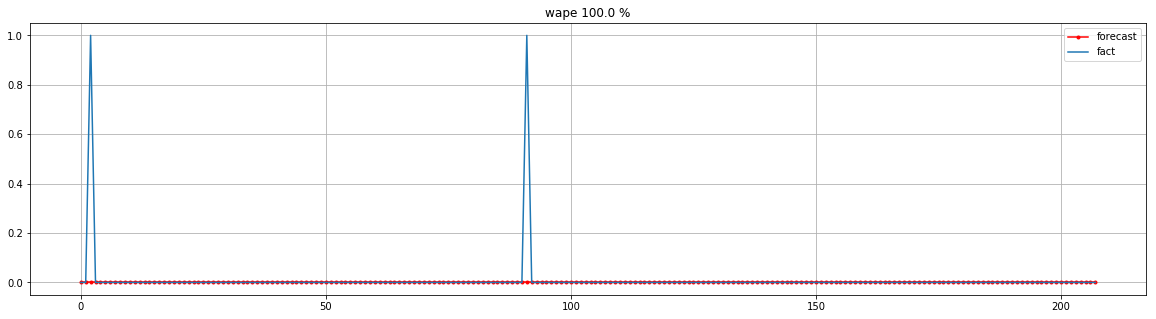

In [190]:
# plt.figure(figsize=(20, 5))
# plt.plot(tree_forc, ".r-", label="forecast")
# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, tree_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

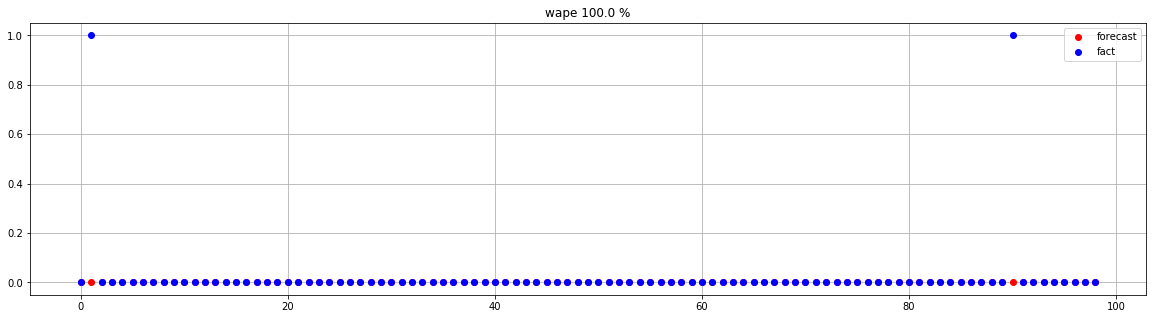

In [192]:
# plt.figure(figsize=(20, 5))
# plt.plot(tree_forc[1:100], 'go', color = 'r', label="forecast")
# plt.plot(y_test.values[1:100], 'go', color = 'b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, tree_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [193]:
# coefficient_of_dermination = r2_score(y_test, tree_forc)
# coefficient_of_dermination

-0.009708737864077444

In [228]:
# independent_columns_names = x_train.columns.values
# pd.DataFrame({'feat': independent_columns_names,
#               'coef': clf_tree.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
81,0.386800,Tax_inspection_09
0,0.385867,1110
92,0.092368,Tax_inspection_21
22,0.074490,1300
103,0.060474,Tax_inspection_32
98,0.000000,Tax_inspection_27
99,0.000000,Tax_inspection_28
100,0.000000,Tax_inspection_29
101,0.000000,Tax_inspection_30
102,0.000000,Tax_inspection_31


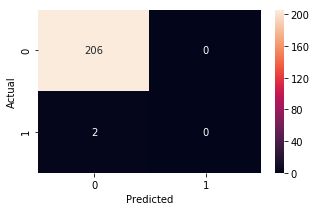

In [232]:
# import seaborn as sns 
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, tree_forc)
# fig, ax = plt.subplots(figsize=(5,3))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [236]:
# from sklearn import metrics 
# print(metrics.classification_report(y_test, tree_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### RF

In [195]:
# clf_rf = RandomForestClassifier(max_depth = 4, max_features = 0.7, min_samples_split = 2, n_estimators = 40, random_state =0)
# clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [196]:
# clf_rf.score(x_train, y_train)

0.9927623642943305

In [197]:
# RF_forc = clf_rf.predict(x_test)

In [198]:
# mae(y_test.values, RF_forc)

0.009615384615384616

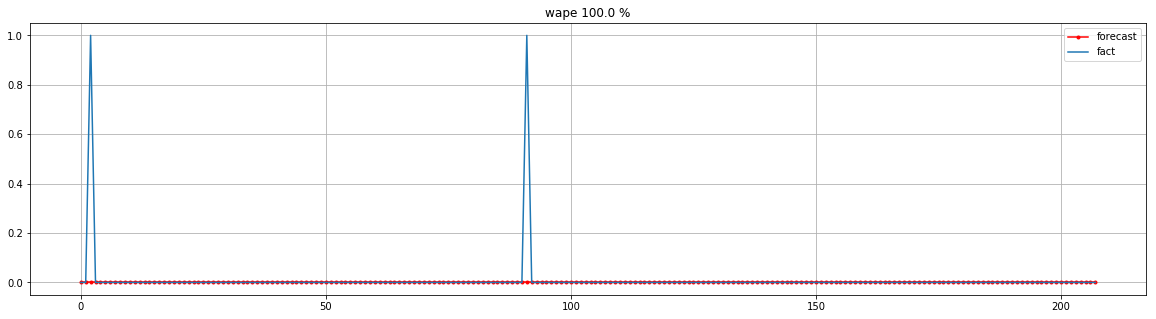

In [199]:
# plt.figure(figsize=(20, 5))
# plt.plot(RF_forc, ".r-", label="forecast")
# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, RF_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

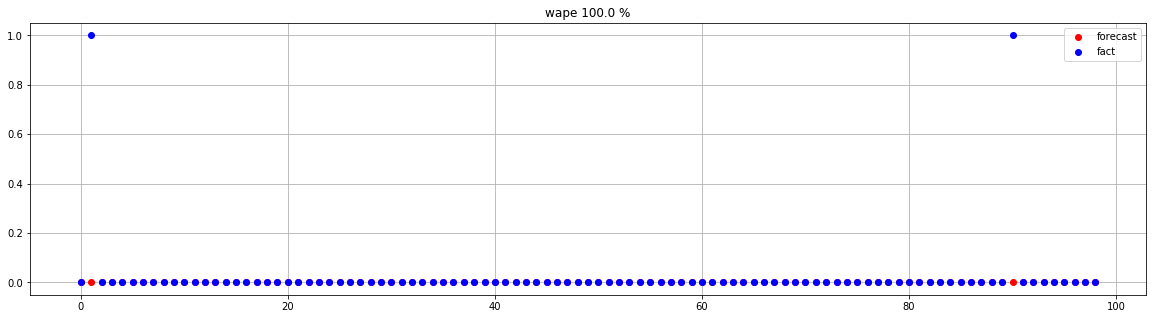

In [200]:
# plt.figure(figsize=(20, 5))
# plt.plot(RF_forc[1:100], 'go', color = 'r', label="forecast")
# plt.plot(y_test.values[1:100], 'go', color = 'b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, RF_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [201]:
# coefficient_of_dermination = r2_score(y_test, RF_forc)
# coefficient_of_dermination

-0.009708737864077444

In [229]:
# independent_columns_names = x_train.columns.values
# pd.DataFrame({'feat': independent_columns_names,
#               'coef': clf_rf.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
81,0.138525,Tax_inspection_09
0,0.102151,1110
92,0.094149,Tax_inspection_21
22,0.084873,1300
103,0.047614,Tax_inspection_32
75,0.043770,Tax_inspection_02
33,0.043271,1700
34,0.043036,2110
35,0.035054,2120
12,0.031776,1250


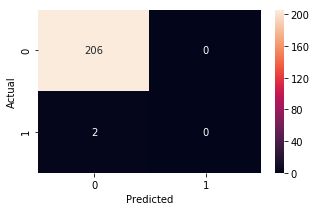

In [233]:
# import seaborn as sns 
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, RF_forc)
# fig, ax = plt.subplots(figsize=(5,3))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [237]:
# from sklearn import metrics 
# print(metrics.classification_report(y_test, RF_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### XGBoost

In [203]:
# clf_xgb = xgb.XGBClassifier(max_depth = 3, colsample_bytree = 0.6, gamma = 0.1, learning_rate = 2, n_estimators = 20, subsample = 0.4, random_state =0)
# clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4)

In [204]:
# clf_xgb.score(x_train, y_train)

0.991556091676719

In [205]:
# xgb_forc = clf_xgb.predict(x_test)

In [206]:
# mae(y_test.values, xgb_forc)

0.009615384615384616

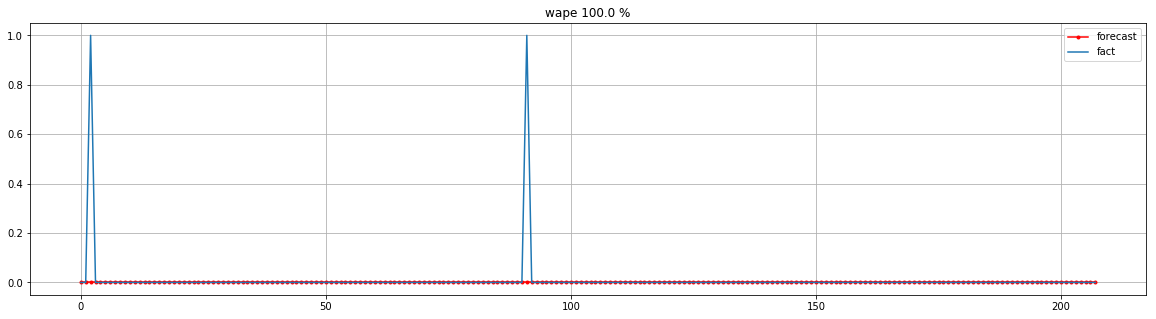

In [207]:
# plt.figure(figsize=(20, 5))
# plt.plot(xgb_forc, ".r-", label="forecast")
# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, xgb_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

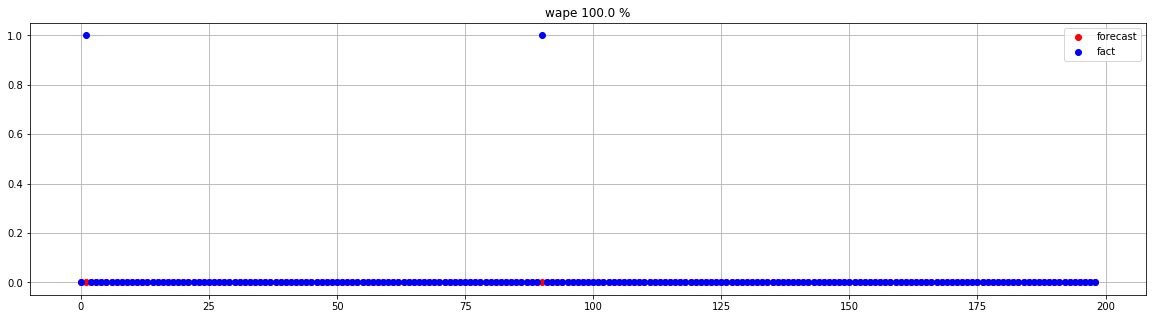

In [210]:
# plt.figure(figsize=(20, 5))
# plt.plot(xgb_forc[1:200], 'go', color = 'r', label="forecast")
# plt.plot(y_test.values[1:200], 'go', color = 'b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, xgb_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [211]:
# coefficient_of_dermination = r2_score(y_test, xgb_forc)
# coefficient_of_dermination

-0.009708737864077444

In [230]:
# independent_columns_names = x_train.columns.values
# pd.DataFrame({'feat': independent_columns_names,
#               'coef': clf_xgb.feature_importances_}).sort_values(by='coef', ascending=False).head(10)

,coef,feat
15,0.260870,1600
2,0.130435,1150
8,0.086957,1210
33,0.086957,1700
22,0.086957,1300
14,0.043478,1200
27,0.043478,1510
12,0.043478,1250
34,0.043478,2110
28,0.043478,1520


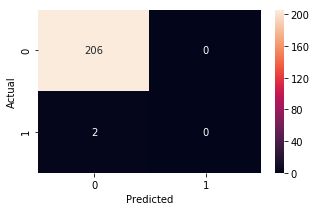

In [234]:
# import seaborn as sns 
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, xgb_forc)
# fig, ax = plt.subplots(figsize=(5,3))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [238]:
# from sklearn import metrics 
# print(metrics.classification_report(y_test, xgb_forc))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.99      0.99       208



### LinearSVC

In [212]:
# clf_lsvc = LinearSVC(C= 1, class_weight= 'balanced', loss= 'squared_hinge', max_iter= 50, penalty= 'l2', tol= 1e-05, random_state =0)
# clf_lsvc.fit(x_train, y_train)

LinearSVC(C=1, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [213]:
# clf_lsvc.score(x_train, y_train)

0.971049457177322

In [214]:
# lsvc_forc = clf_lsvc.predict(x_test)

In [215]:
# mae(y_test.values, lsvc_forc)

0.057692307692307696

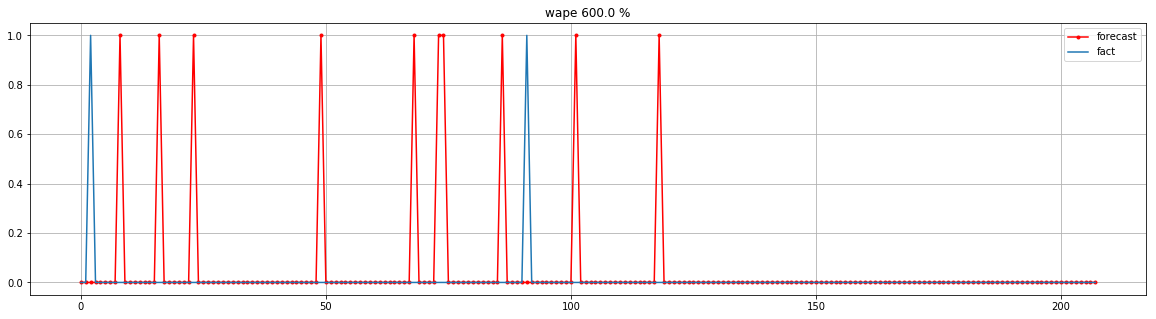

In [216]:
# plt.figure(figsize=(20, 5))
# plt.plot(lsvc_forc, ".r-", label="forecast")
# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, lsvc_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

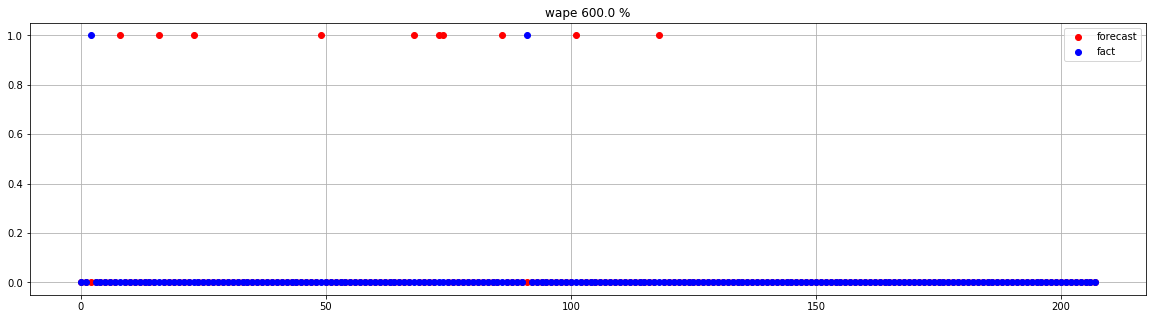

In [217]:
# plt.figure(figsize=(20, 5))
# plt.plot(lsvc_forc, 'go', color = 'r', label="forecast")
# plt.plot(y_test.values, 'go', color = 'b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, lsvc_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [218]:
# coefficient_of_dermination = r2_score(y_test, lsvc_forc)
# coefficient_of_dermination

-5.058252427184465

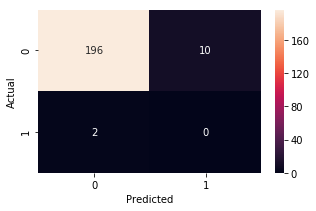

In [235]:
# import seaborn as sns 
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, lsvc_forc)
# fig, ax = plt.subplots(figsize=(5,3))
# sns.heatmap(conf_mat, annot=True, fmt='d')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [239]:
# from sklearn import metrics 
# print(metrics.classification_report(y_test, lsvc_forc))

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       206
          1       0.00      0.00      0.00         2

avg / total       0.98      0.94      0.96       208



### SVC

In [219]:
# clf_svc = SVC(C= 10, class_weight= 'balanced', max_iter= 100, tol= 1e-05, random_state =0)
# clf_svc.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=100, probability=False, random_state=0, shrinking=True,
  tol=1e-05, verbose=False)

In [220]:
# clf_svc.score(x_train, y_train)

0.9951749095295537

In [221]:
# svc_forc = clf_svc.predict(x_test)

In [222]:
# mae(y_test.values, svc_forc)

0.028846153846153848

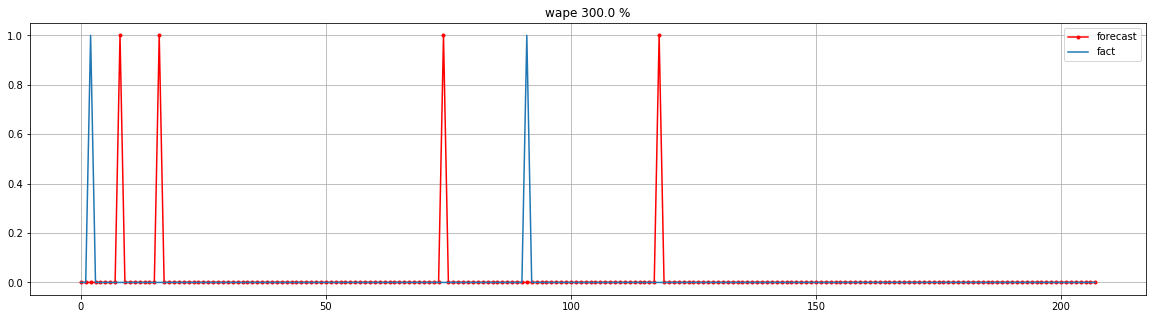

In [223]:
# plt.figure(figsize=(20, 5))
# plt.plot(svc_forc, ".r-", label="forecast")
# plt.plot(y_test.values, label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, svc_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

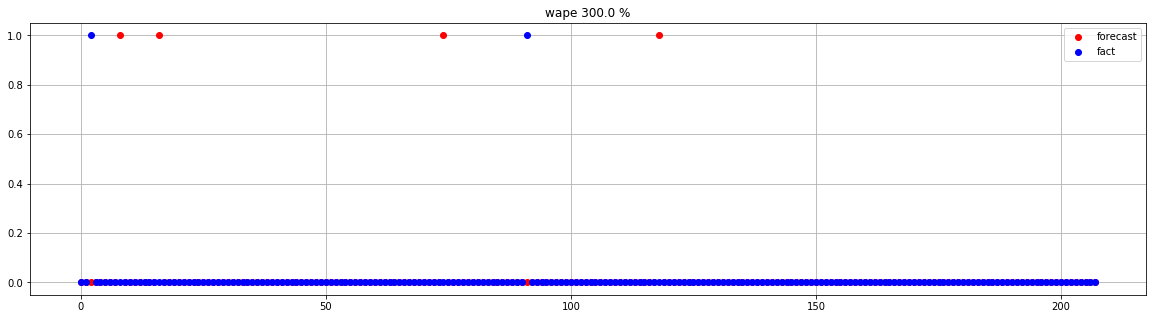

In [224]:
# plt.figure(figsize=(20, 5))
# plt.plot(svc_forc, 'go', color = 'r', label="forecast")
# plt.plot(y_test.values, 'go', color = 'b',label="fact")
# plt.legend(loc="best")
# plt.title("wape {} %".format(round(wape(y_test, svc_forc))))
# plt.legend(loc="best")
# plt.legend()
# plt.grid(True)

In [225]:
# coefficient_of_dermination = r2_score(y_test, svc_forc)
# coefficient_of_dermination

-2.0291262135922326

In [231]:
# ROC AUC code

# fpr1, tpr1, thresholds = roc_curve(y_test, y_pred)
# auc1=auc(fpr1, tpr1)
# print ("auc for the first class",auc1)

# # ploting the roc curve
# plt.plot(fpr1,tpr1)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.0])
# plt.title('Roc curve')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.legend(loc="lower right")
# plt.show()